In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

## Analyze results of running SVRT problems in separate context windows

In [2]:
all_results = pd.read_csv('results/23_limited_results.csv')
print(all_results.columns)

# Load original Fleuret problem means (using not their reported means, but means that include fails)
fname = '../../humans/data_fleuret/fleuret_svrt_data.csv'
fleuret_svrt_data = pd.read_csv(fname)
print(fleuret_svrt_data.columns)

Index(['Unnamed: 0', 'trial', 'file_path', 'shortened_file_path', 'problem',
       'category', 'exemplar', 'num_calls_to_API', 'raw_response_to_trial',
       'selected_category', 'accuracy', 'correct_in_row', 'feedback',
       'raw_response_to_feedback', 'feedback_response',
       'raw_response_to_next_problem', 'next_problem_response', 'temperature'],
      dtype='object')
Index(['participant', 'problem', 'trials_to_criterion'], dtype='object')


In [7]:
final_results = all_results.groupby(['problem']).trial.count().to_frame().reset_index()
final_results = final_results.rename(columns = {'trial': 'raw_trials'})

# Trial counts are not trials to criterion yet (need to subtract 7, unless fail)
final_results['trials_to_criterion'] = [34 if raw_trial == 34 else raw_trial - 7 for raw_trial in final_results.raw_trials]

# Fleuret data sets fails to 35, but this is not comparable to GPT's fails set to 34 (need to change all 35s to 34s)
fleuret_svrt_data['trials_to_criterion'] = [34 if trials_to_criterion == 35 else trials_to_criterion for trials_to_criterion in fleuret_svrt_data['trials_to_criterion']]

# Add a source column for plotting
final_results['source'] = 'gpt-4o / High Image Detail'
fleuret_svrt_data['source'] = 'Human Data from Fleuret et al. (2011)'

# Concat both files
final_results = pd.concat([final_results, fleuret_svrt_data])
final_results = final_results.sort_values('source')

display(final_results)

,problem,raw_trials,trials_to_criterion,source,participant
218,12,NaN,7,Human Data from Fleuret et al. (2011),10.0
306,8,NaN,1,Human Data from Fleuret et al. (2011),14.0
305,7,NaN,34,Human Data from Fleuret et al. (2011),14.0
304,6,NaN,34,Human Data from Fleuret et al. (2011),14.0
303,5,NaN,1,Human Data from Fleuret et al. (2011),14.0
...,...,...,...,...,...
20,21,34.0,34,gpt-4o / High Image Detail,NaN
21,22,28.0,21,gpt-4o / High Image Detail,NaN
22,23,34.0,34,gpt-4o / High Image Detail,NaN
11,12,34.0,34,gpt-4o / High Image Detail,NaN


### Plot ordered by human data

<Figure size 640x480 with 0 Axes>

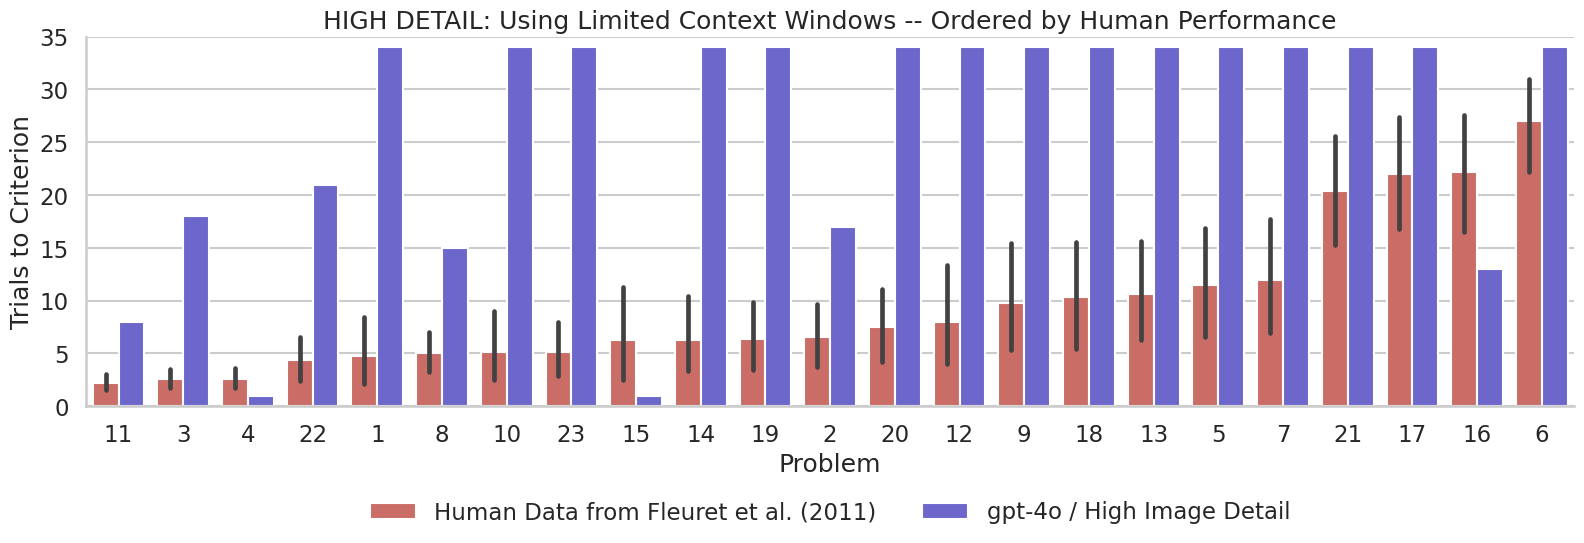

In [8]:
# Order of problem difficulty based on problem means calculated WITH participant fails
my_problem_means = fleuret_svrt_data.groupby(['problem']).trials_to_criterion.mean().to_frame().reset_index()
order_problem_means_with_fails = my_problem_means.sort_values('trials_to_criterion').problem.to_list()

#
sns.set_context('talk')
sns.set_style("whitegrid")
sns.set_palette('hls', 2)
plt.tight_layout()

# Plot
plt.figure(figsize = (6.4*3, 4.8))
sns.barplot(
    data = final_results,
    x = 'problem',
    y = 'trials_to_criterion',
    hue = 'source',
    order = order_problem_means_with_fails,
    palette = [
        sns.hls_palette()[0],
        sns.hls_palette()[4]
    ]
).set(
    xlabel = 'Problem',
    ylabel = 'Trials to Criterion',
    ylim = (0,35),
    title = 'HIGH DETAIL: Using Limited Context Windows -- Ordered by Human Performance'
)
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4).get_frame().set_linewidth(0.0)
sns.despine()

### Plot of same-different vs. spatial relations

,problem,raw_trials,trials_to_criterion,source,participant,relation_color
3,4,8.0,1,gpt-4o / High Image Detail,NaN,"(0.33999999999999997, 0.8287999999999999, 0.86)"
14,15,8.0,1,gpt-4o / High Image Detail,NaN,"(0.86, 0.3712, 0.33999999999999997)"
10,11,15.0,8,gpt-4o / High Image Detail,NaN,"(0.33999999999999997, 0.8287999999999999, 0.86)"
15,16,20.0,13,gpt-4o / High Image Detail,NaN,"(0.86, 0.3712, 0.33999999999999997)"
7,8,22.0,15,gpt-4o / High Image Detail,NaN,"(0.86, 0.33999999999999997, 0.8287999999999999)"
1,2,24.0,17,gpt-4o / High Image Detail,NaN,"(0.33999999999999997, 0.8287999999999999, 0.86)"
2,3,25.0,18,gpt-4o / High Image Detail,NaN,"(0.33999999999999997, 0.8287999999999999, 0.86)"
21,22,28.0,21,gpt-4o / High Image Detail,NaN,"(0.86, 0.3712, 0.33999999999999997)"
9,10,34.0,34,gpt-4o / High Image Detail,NaN,"(0.33999999999999997, 0.8287999999999999, 0.86)"
22,23,34.0,34,gpt-4o / High Image Detail,NaN,"(0.33999999999999997, 0.8287999999999999, 0.86)"


/tmp/ipykernel_1665684/1248446972.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


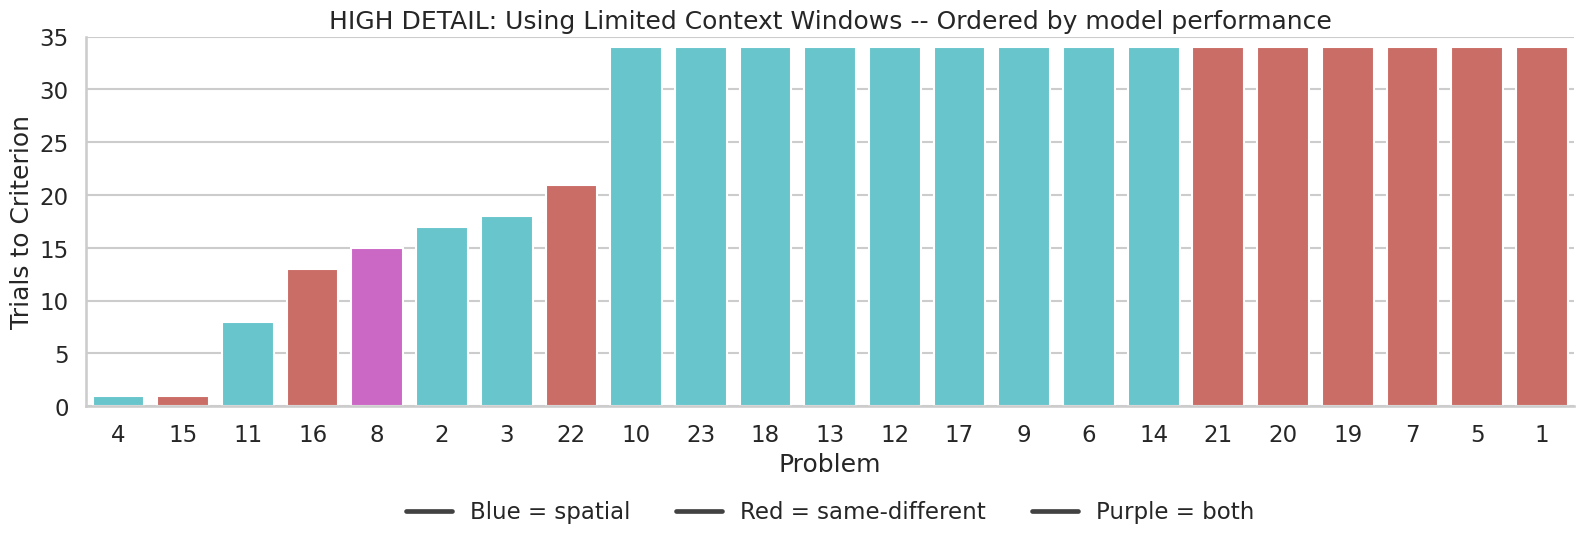

In [10]:
# Just gpt results
results_gpt = final_results[final_results.source == 'gpt-4o / High Image Detail']

# SORT VALUES by trials to criterion
results_gpt = results_gpt.sort_values('trials_to_criterion')

# Order of problem difficulty based on problem means calculated WITH participant fails
order_gpt = results_gpt.problem.to_list()

# Lists of x-ticks for different coloring
same_different = [20,7,21,19,1,22,5,15,16,]  
spatial = [6,17,9,13,23,14,4,12,10,18,3,11,2]
both = [8]

# Create a color list based on membership in the lists above
def assign_color(problem):
    if problem in same_different:
        return (0.86, 0.3712, 0.33999999999999997)  # seaborn hls red
    elif problem in spatial:
        return (0.33999999999999997, 0.8287999999999999, 0.86)  # seaborn hls blue
    elif problem in both:
        return (0.86, 0.33999999999999997, 0.8287999999999999)  # seaborn hls light purple
results_gpt['relation_color'] = [assign_color(problem) for problem in results_gpt['problem']]

# Sort values again 
results_gpt = results_gpt.sort_values(['trials_to_criterion','relation_color'])

display(results_gpt)

# Plot
plt.figure(figsize = (6.4*3, 4.8))
sns.set_context('talk')
sns.set_style("whitegrid")
plt.tight_layout()
sns.barplot(
    data = results_gpt,
    x = 'problem',
    y = 'trials_to_criterion',
    order = results_gpt['problem'],
    palette = results_gpt['relation_color'].to_list()
).set(
    xlabel = 'Problem',
    ylabel = 'Trials to Criterion',
    ylim = (0,35),
    title = 'HIGH DETAIL: Using Limited Context Windows -- Ordered by model performance'
)
plt.legend(labels=['Blue = spatial', 'Red = same-different', 'Purple = both'], bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4).get_frame().set_linewidth(0.0)
sns.despine()